### Regression
1) It is a predictive modeling technique which investigates the realtionship between dependent and independent variables(one or more) <br>
2) Dependent variable is continuous in nature eg - Sales, Weight, Profit, Revenue, Price,Distance, Magintude,Height, Weight etc<br>

3) <pre>
   y = depenedent varaible/output
   x = independent variable/input(s)
   </pre>

### Simple Linear Regression
1) It is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line.<br>
2) It has an equation of the form <b>y = ax + b or y = mx + c</b><br>

Where-<br>
x = independent variable/ input feature/input attribute/input column<br>
y = dependent variable / output feature/target attribute/ output column<br>
a/m = slope or coefficient or weight or how much we expect y to change as x changes       
b/c = intercept / constant / bias<br>

In this graph, x = Time spent Studying, y = Marks obtained. The orange dots are the corresponding data points. The blue line is the best fit line for Linear regression(y = mx +c)

<img src="reg1.png">

#### Best Fit Line
The Linear Regression model finds the best fit line that minimizes the squared error between the actual data points and its perpendicular dropped on the predicted line.<br>

SST = Total Sum of Squares <br>
SSE = Error/Residual Sum of squares <br>
SSR = Regression sum of squares<br>

<img src="reg2.png">

<img src="reg3.png">

#### R2 score (Coefficient of Determination or Goodness of Fit)

The coefficient of determination is the portion of the total variation in the dependent variable that is explained by variation in the independent variable/(s)

<img src="reg4.png">

<b>SST = SSE + SSR</b><br>
R2 score  = SSR/SST = (SST- SSE)/ SST = 1 – SSE/SST<br>
When SSE= 0, R2 score = 1 (Best Case Scenario)<br>
and when SSE = SST, R2 score = 0 (Worst Case Scenario)



### Regression Metrics

<img src="reg5.png">

### Multiple Linear Regression

1)	Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable. <br>

2)	It has an equation of the form <b>y = m1x1 + m2x2 + m3x3 +…..+ mnxn + b </b><br>
where:-<br>
x1 - xn = independent variables/ input features<br>
y = dependent variable / output feature<br>
m1,m2,....,mn = coefficients/slope  corresponding to x1 - xn             
b = intercept / constant / bias<br>

3)	It is practically out of scope to represent multiple linear regression on a scatter chart with actual data points and a regression line as the scatter chart would have to span multiple dimensions corresponding to each independent variable and likewise the Regression line would also span across multiple dimensions<br>


#### Pros
1)Linear Regression performs well when the dataset is linearly dependent

2)Linear Regression is easier to implement, interpret and efficient to train.

#### Cons
1) Main limitation of Linear Regression is the assumption of linearity between the dependent variable and the independent variables. In the real world, the data may not always be linearly dependent.


#### For every  Regression Model

1) Model only accepts int or float as input for x and y<br>
2) Model will not accpet any null value<br>
3) x has to be either a DataFrame or a 2D numpy array or a list of list<br>
3) y has to be either a Series or a 1D numpy array or a list


#### DataFrame
a) In a dataframe, data is represented in rows and columns with index. Generally Dataframe consists of multiple column data.<br>
b) DataFrame can be of single column with index, however it can contain multiple indexes.

#### Series
a) Single column data with index<br>
b) Series cannot contain multiple column, however it can contain multiple indexes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Simple Linear Regression

#### 1) Load the data

In [12]:
d = {'Area(sqft)': [2600,3000,3200,3600,4000],
    'Price' : [550000,565000,610000,680000,725000]}
print(d)
type(d)

{'Area(sqft)': [2600, 3000, 3200, 3600, 4000], 'Price': [550000, 565000, 610000, 680000, 725000]}


dict

In [13]:
df1 = pd.DataFrame(d)
df1

,Area(sqft),Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


#### Problem Statement - Based on Area(Sqft) predict the Price
a) Area = 4400 sqft<br>
b) Area = 3450 sqft

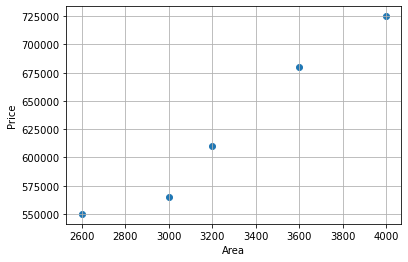

In [14]:
plt.scatter(df1['Area(sqft)'],df1['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid()
plt.show()

In [16]:
x = df1[['Area(sqft)']]
y = df1['Price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(5, 1)
(5,)


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
m1 = LinearRegression()
m1.fit(x,y)

# model.fit() - Trains the ML model on the training data.

LinearRegression()

In [19]:
print('R2 Score',m1.score(x,y))

R2 Score 0.9584301138199486


In [20]:
ypred_m1 = m1.predict(x)
print(ypred_m1)

[533664.38356164 587979.45205479 615136.98630137 669452.05479452
 723767.12328767]


In [22]:
df1['Price_pred'] = ypred_m1
df1.head()

,Area(sqft),Price,Price_pred
0,2600,550000,533664.383562
1,3000,565000,587979.452055
2,3200,610000,615136.986301
3,3600,680000,669452.054795
4,4000,725000,723767.123288


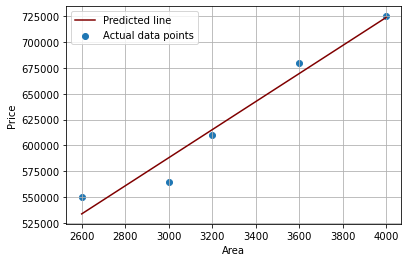

In [26]:
plt.scatter(df1['Area(sqft)'],df1['Price'],label='Actual data points')
plt.plot(df1['Area(sqft)'],df1['Price_pred'],label='Predicted line',color='maroon')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [27]:
### ypred = mx + c
m = m1.coef_
c = m1.intercept_
print('Intercept',m)
print('Coefficient',c)

Intercept [135.78767123]
Coefficient 180616.43835616432


In [28]:
# Price_Pred_eqn = Area*m + c
df1['Price_pred_eqn'] = df1['Area(sqft)']*m + c
df1.head()

,Area(sqft),Price,Price_pred,Price_pred_eqn
0,2600,550000,533664.383562,533664.383562
1,3000,565000,587979.452055,587979.452055
2,3200,610000,615136.986301,615136.986301
3,3600,680000,669452.054795,669452.054795
4,4000,725000,723767.123288,723767.123288


In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [30]:
def gen_metrics(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

In [33]:
gen_metrics(y,ypred_m1)
print('R2 Score',m1.score(x,y))

MAE 11246.57534246575
MSE 186815068.4931509
RMSE 13668.030893042014
R2_Score 0.9584301138199486
R2 Score 0.9584301138199486


In [ ]:
# Problem Statement - Based on Area(Sqft) predict the Price

# a) Area = 4400 sqft
# b) Area = 3450 sqft


In [35]:
ypred_4400_w1 = m1.predict([[4400]])
ypred_4400_w2  = 4400*m + c
print(ypred_4400_w1)
print(ypred_4400_w2)

[778082.19178082]
[778082.19178082]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
ypred_3450_w1 = m1.predict([[3450]])
ypred_3450_w2  = 3450*m + c
print(ypred_3450_w1)
print(ypred_3450_w2)

[649083.90410959]
[649083.90410959]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Multiple Linear Regression

In [38]:
df2 = pd.read_csv('house_price2.csv')
df2.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


#### Problem Statement - Based on Area, Bedrooms and Age, predict the value of Price of the House

In [40]:
df2.shape

(6, 4)

In [42]:
df2.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [43]:
br_mean = df2['bedrooms'].mean()
br_med = df2['bedrooms'].median()
print('Br_mean',br_mean)
print('Br_median',br_med)

Br_mean 4.2
Br_median 4.0


In [45]:
df2['bedrooms'].fillna(br_med,inplace=True)
df2.head(6)

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [47]:
x2 = df2[['area','bedrooms','age']]
y2 = df2['price']
print(type(x2))
print(type(y2))
print(x2.shape)
print(y2.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(6, 3)
(6,)


In [48]:
m2 = LinearRegression()
m2.fit(x2,y2)

LinearRegression()

In [49]:
print('R2_Score',m2.score(x2,y2))

R2_Score 0.9550196399325818


In [50]:
ypred_m2 = m2.predict(x2)
print(ypred_m2)

[518217.63297611 602590.07937407 615307.4140366  597962.89583192
 760663.42675457 795258.55102673]


In [51]:
m = m2.coef_
c = m2.intercept_
print('Slope or Coeffiecint',m)
print('Intercept',c)

Slope or Coeffiecint [  112.06244194 23388.88007794 -3231.71790863]
Intercept 221323.00186540443


In [54]:
df2['Price_pred'] = ypred_m2
df2['Price_pred_eqn'] = df2['area']*m[0] + df2['bedrooms']*m[1] + df2['age']*m[2] + c
df2.head(6)

,area,bedrooms,age,price,Price_pred,Price_pred_eqn
0,2600,3.0,20,550000,518217.632976,518217.632976
1,3000,4.0,15,565000,602590.079374,602590.079374
2,3200,4.0,18,610000,615307.414037,615307.414037
3,3600,3.0,30,595000,597962.895832,597962.895832
4,4000,5.0,8,760000,760663.426755,760663.426755
5,4100,6.0,8,810000,795258.551027,795258.551027


In [56]:
gen_metrics(y2,ypred_m2)
print('R2_Score',m2.score(x2,y2))

MAE 15507.93866572012
MSE 446305128.22449404
RMSE 21125.93496687174
R2_Score 0.9550196399325818
R2_Score 0.9550196399325818


In [57]:
df2.head()

,area,bedrooms,age,price,Price_pred,Price_pred_eqn
0,2600,3.0,20,550000,518217.632976,518217.632976
1,3000,4.0,15,565000,602590.079374,602590.079374
2,3200,4.0,18,610000,615307.414037,615307.414037
3,3600,3.0,30,595000,597962.895832,597962.895832
4,4000,5.0,8,760000,760663.426755,760663.426755


In [58]:
### Predict price when 
# 1) Area = 4250, bedrooms=5,age=7

In [59]:
ypred_test_w1 = m2.predict([[4250,5,7]])
ypred_test_w2 = 4250*m[0] + 5*m[1] + 7*m[2] + c
print(ypred_test_w1)
print(ypred_test_w2)

[791910.75514874]
791910.7551487412


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
